<a href="https://colab.research.google.com/github/SwatiBGupta1110/ML_Regression/blob/main/Gelly_Auto_CarPricePrediction_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A chinese automobile company GEELY Auto aspired to enter the US market by setting up their manufacturing unit there and to produce cars locally. 
The goal was to model the price of cars with the available independent variables & to determine the correlation between different variables. 
By utilizing this I drew to a conclusion of which variables are the most correlated to the price of the car. 
Lastly, I was required to predict the price of cars in the test data provided by them.

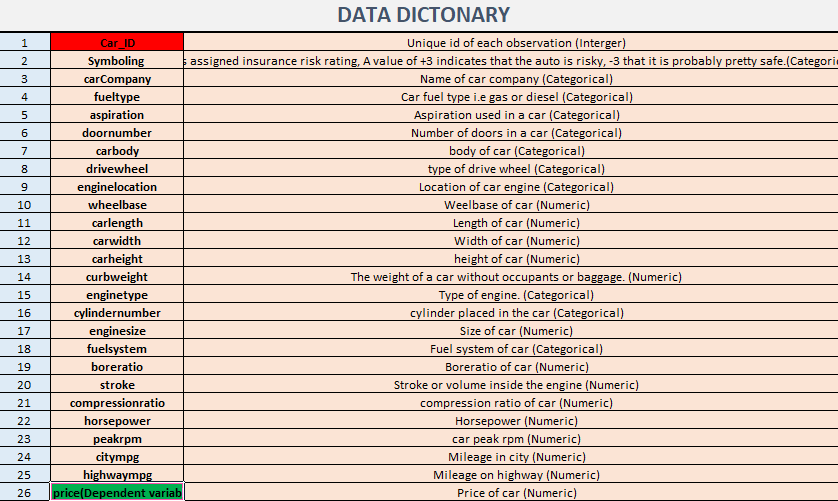

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
data=pd.read_csv("/content/sample_data/CarPrice_Assignment.csv")

In [85]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [86]:
data.shape

(205, 26)

In [87]:
data.drop(columns="car_ID",inplace=True)

In [88]:
#Lets see the datatypes in our Data
data.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [89]:
categorical_data=data.select_dtypes(include='object')
numerical_data=data.select_dtypes(exclude='object')

In [90]:
categorical_data.shape,numerical_data.shape

((205, 10), (205, 15))

In [91]:
#Checking Null values
numerical_data.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [92]:
#Checking Null values
categorical_data.isna().sum()

CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64

In [93]:
categorical_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [94]:
categorical_data["CarName"].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [95]:
categorical_data["CarName"]=categorical_data["CarName"].apply(lambda car_company_name:car_company_name.split(" ")[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
categorical_data

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [97]:
categorical_data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [98]:
categorical_data["CarName"].replace({"maxda":"mazda","Nissan":"nissan","porcshce":"porsche","toyouta":"toyota","vokswagen":"volkswagen"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [123]:
categorical_data.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [129]:
categorical_data_Y=pd.concat([categorical_data,Y],axis=1)

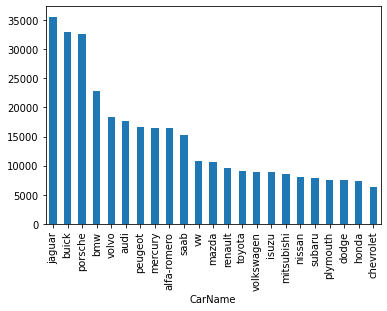

In [133]:
categorical_data_Y.groupby(by="CarName")["price"].median().sort_values(ascending=False).plot.bar()

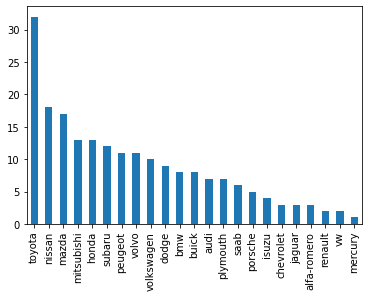

In [128]:
categorical_data["CarName"].value_counts().plot.bar()

In [99]:
dummy_categorical_data=pd.get_dummies(categorical_data,drop_first=True)
dummy_categorical_data.shape

(205, 51)

In [100]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
min_max_scaler=MinMaxScaler()

In [102]:
Y=numerical_data["price"]
numerical_data.drop(columns=["price"],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:
numerical_data_scaled=min_max_scaler.fit_transform(numerical_data)


In [104]:
numerical_data=pd.DataFrame(numerical_data_scaled,columns=numerical_data.columns)



In [105]:
numerical_data

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.655977,0.711940,0.716667,0.641667,0.567882,0.301887,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789
201,0.2,0.655977,0.711940,0.708333,0.641667,0.605508,0.301887,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842
202,0.2,0.655977,0.711940,0.716667,0.641667,0.591156,0.422642,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211
203,0.2,0.655977,0.711940,0.716667,0.641667,0.670675,0.316981,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474


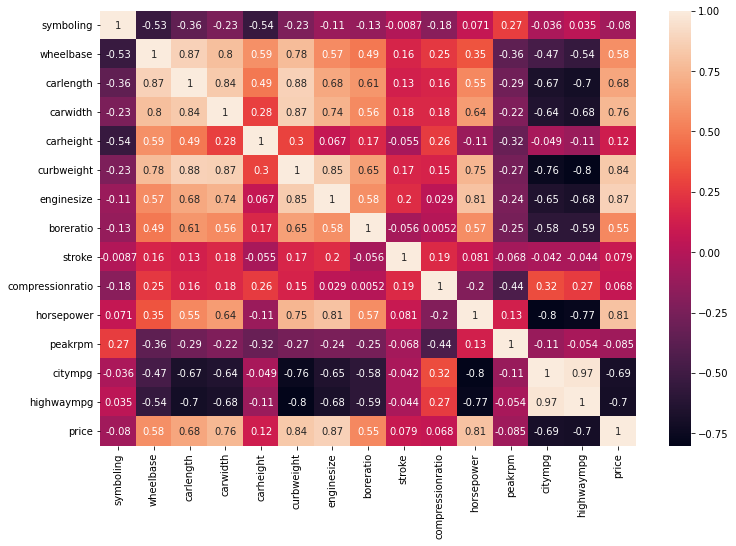

In [119]:

plt.figure(figsize=(12,8))
sns.heatmap(pd.concat([numerical_data,Y],axis=1).corr(),annot=True)
plt.show()

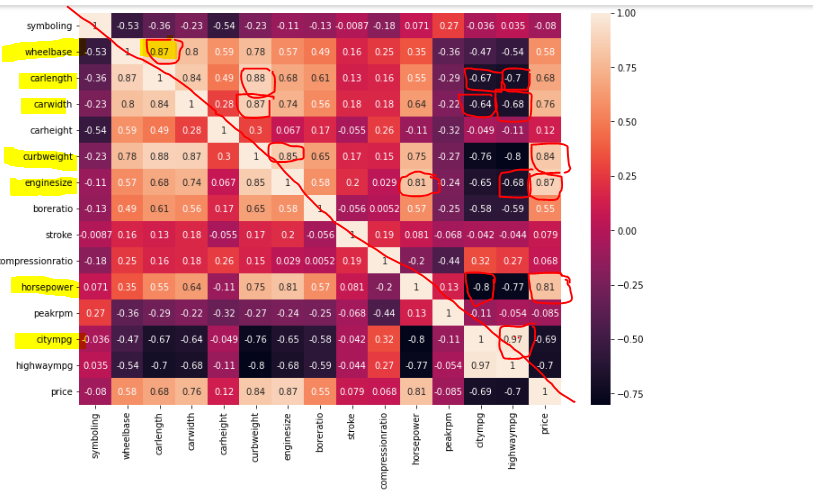

Dropping above columns as High multicollinearity.

In [120]:
numerical_data=numerical_data.drop(columns=["wheelbase", "carlength","carwidth", "curbweight", "enginesize", "horsepower","citympg"])

In [121]:
scaled_data=pd.concat([dummy_categorical_data,numerical_data,Y],axis=1)
scaled_data

,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo,CarName_vw,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling,carheight,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,0.083333,0.664286,0.290476,0.12500,0.346939,0.289474,13495.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1.0,0.083333,0.664286,0.290476,0.12500,0.346939,0.289474,16500.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.6,0.383333,0.100000,0.666667,0.12500,0.346939,0.263158,16500.0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.8,0.541667,0.464286,0.633333,0.18750,0.551020,0.368421,13950.0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.8,0.541667,0.464286,0.633333,0.06250,0.551020,0.157895,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.2,0.641667,0.885714,0.514286,0.15625,0.510204,0.315789,16845.0
201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.2,0.641667,0.885714,0.514286,0.10625,0.469388,0.236842,19045.0
202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.2,0.641667,0.742857,0.380952,0.11250,0.551020,0.184211,21485.0
203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0.2,0.641667,0.335714,0.633333,1.00000,0.265306,0.289474,22470.0


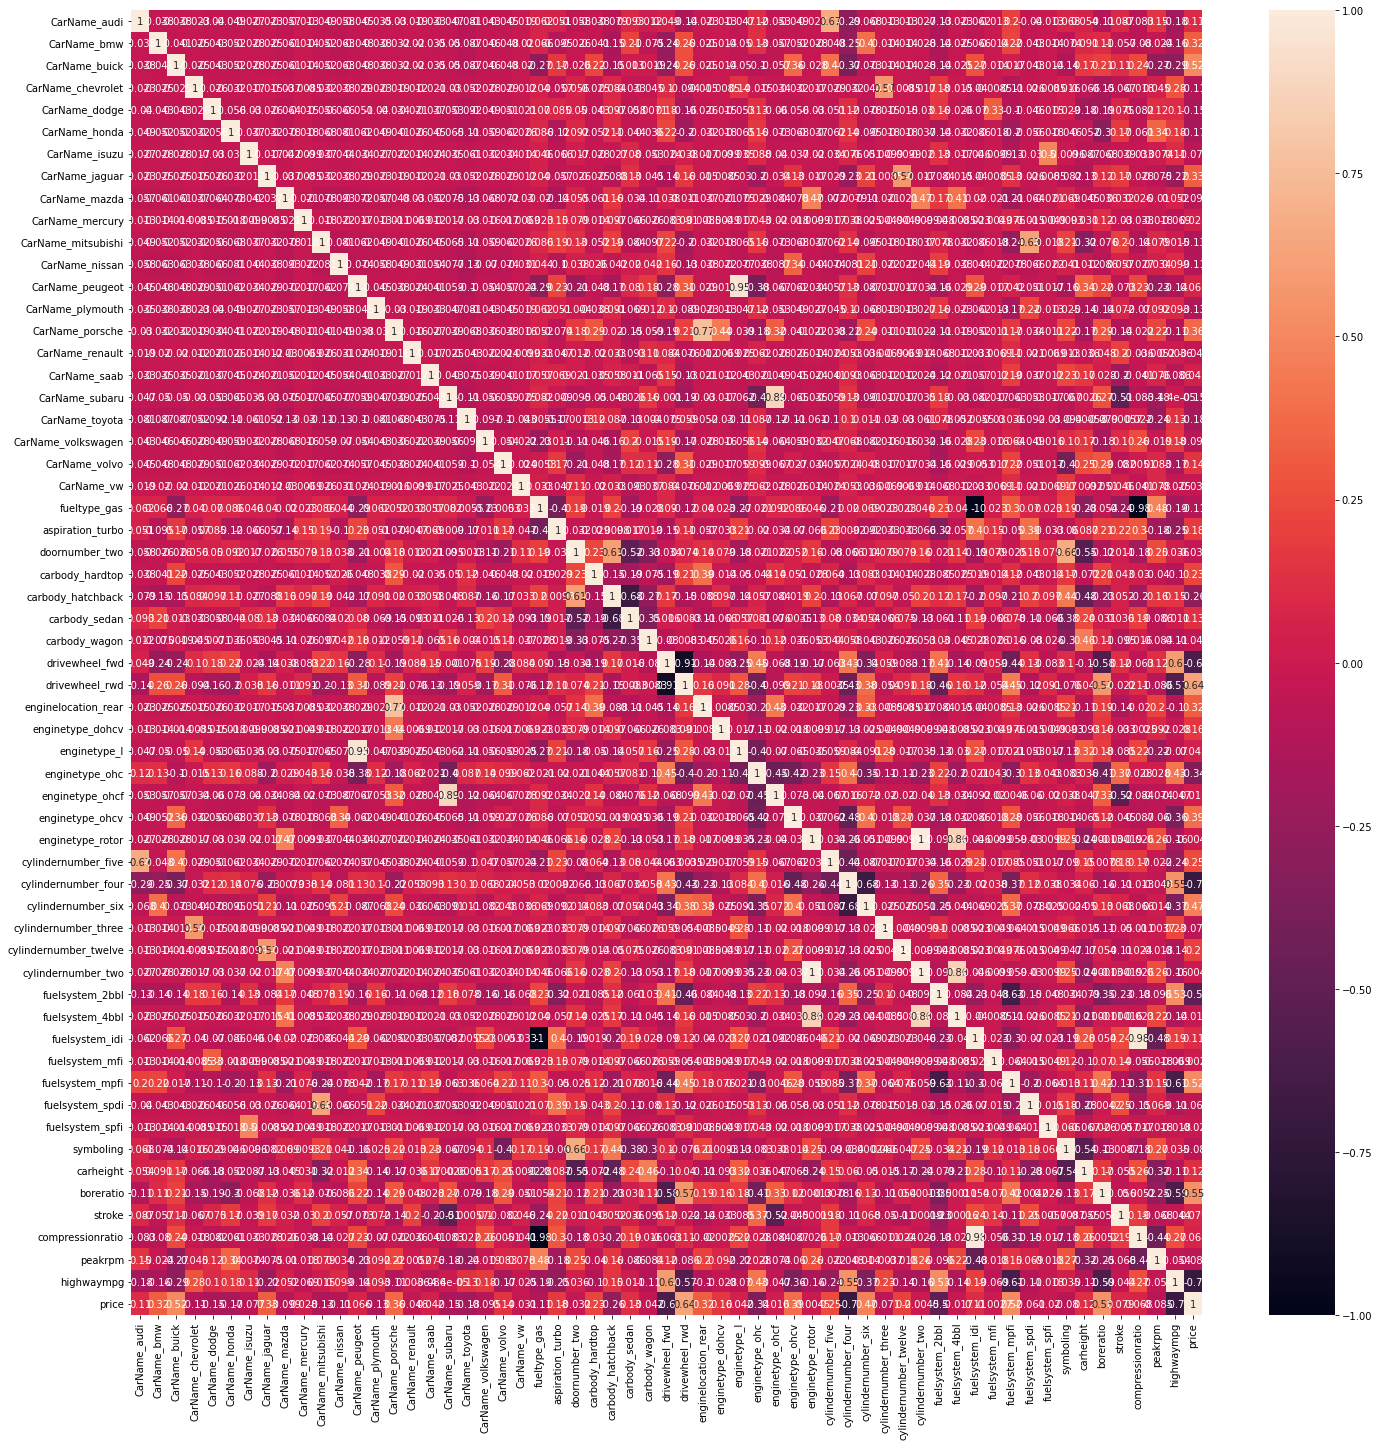

In [122]:
#Plotting Heatmap

plt.figure(figsize=(24,24))
sns.heatmap(scaled_data.corr(),annot=True)
plt.show()